In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = '11c_HhAyF2hqrOcdtTnwB0G90vqIsyuUz'
downloaded = drive.CreateFile({'id': file_id})

downloaded.GetContentFile('RUL_training-data.xlsx')

!pip install -q xlrd

import pandas as pd
df = pd.read_excel('RUL_training-data.xlsx')

# we import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.metrics import classification_report
from sklearn import metrics

x_input = df.to_numpy()

#------------------------------------------------

time = []
#time array is the collection of life of all engine times 
indice = []

for i in range(0, x_input.shape[0]-1):
  if x_input[i][0] != x_input[i+1][0]:
    time.append(x_input[i][1])
    indice.append(i)
  else:
    continue

time.append(x_input[x_input.shape[0]-1][1])
indice.append(x_input.shape[0]-1)

time = np.array(time)
indice = np.array(indice)

#time.shape should give number of engines i.e. 133

#-------------------------------------------------
y_train = []

#array y gives RUL - Remaining Useful Life corresponding to each row in x

j = 0
for i in range(0, x_input.shape[0]):
  y_train.append(time[j] - x_input[i][1])
  if time[j] == x_input[i][1]:
    j = j+1

y_train = np.array(y_train)

#----------------------------------------------
x_train = np.delete(x_input, 0, 1)

#----------------------------------------------
file_id = '1l_jOjgrQNVipZsRgSTHd0Qf81oloHmTX'
downloaded = drive.CreateFile({'id': file_id})

downloaded.GetContentFile('RUL_testing-data.xlsx')

df2 = pd.read_excel('RUL_testing-data.xlsx')
x_input2 = df2.to_numpy()
#----------------------------------------------

time2 = []

for i in range(0, x_input2.shape[0]-1):
  if x_input2[i][0] != x_input2[i+1][0]:
    time2.append(x_input2[i][1])
  else:
    continue

time2.append(x_input2[x_input2.shape[0]-1][1])
time2 = np.array(time2)

#-------------------------------------------
y_test = []

#array y gives RUL - Remaining Useful Life corresponding to each row in x

j = 0
for i in range(0, x_input2.shape[0]):
  y_test.append(time2[j] - x_input2[i][1])
  if time2[j] == x_input2[i][1]:
    j = j+1

y_test = np.array(y_test)

#-----------------------------------------

x_test = np.delete(x_input2, 0, 1)
#----------------------------------------

from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(x_train[1:])
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

#---------------------------------------

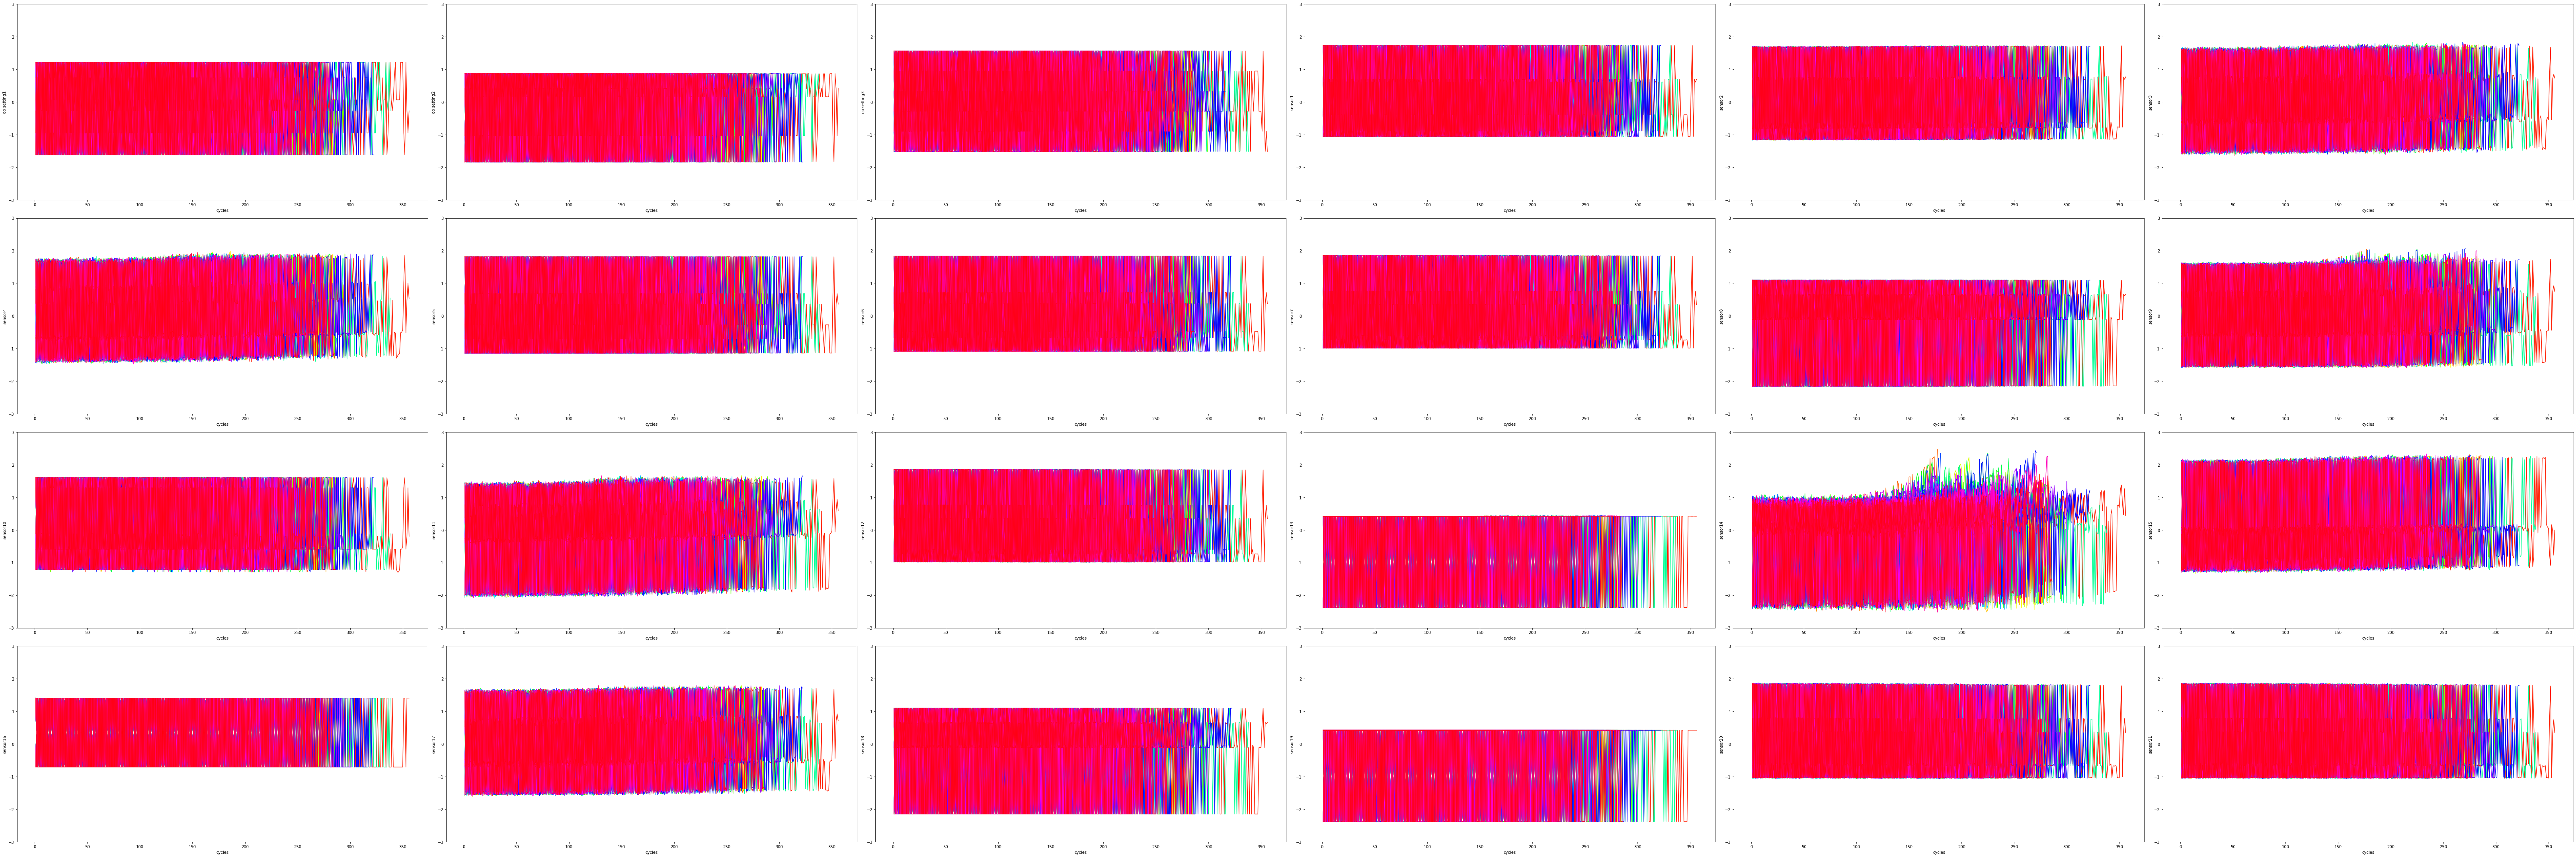

In [ ]:
def get_cmap(n, name='hsv'):
    return plt.cm.get_cmap(name, n)

cmap = get_cmap(218)

from sklearn import preprocessing

x_input_scaled = preprocessing.scale(x_input)

fig, axes= plt.subplots(figsize=(90, 30), nrows=4, ncols=6)

count = 1
for i in range(0, 4):
  for j in range(0, 6):
    if count <= 3:
      axes[i][j].set_ylabel("op setting" + str(count))
    else:
      axes[i][j].set_ylabel("sensor" + str(count-3))
    
    k = 0 
    for k in range(0, 217):
      if k==0:
        axes[i][j].plot(x_input[0:indice[0], 1], x_input_scaled[0:indice[0], count+1], c=cmap(0))
      axes[i][j].plot(x_input[indice[k]+1:indice[k+1], 1], x_input_scaled[indice[k]+1:indice[k+1], count+1], c=cmap(k+1))
      axes[i][j].set_ylim([-3, 3])
    
    axes[i][j].set_xlabel('cycles')
    count = count+1

plt.tight_layout()
plt.show()

0.0006491712180155708


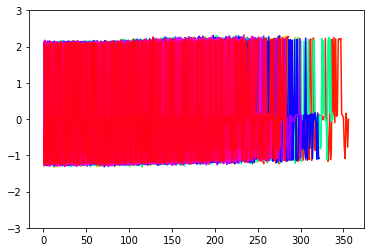

In [ ]:
slope = []

for k in range(0, 217):
  if k==0:
    plt.plot(x_input[0:indice[0], 1], x_input_scaled[0:indice[0], 19], c=cmap(0))
    m, b = np.polyfit(x_input[0:indice[0], 1], x_input_scaled[0:indice[0], 19], 1)
    slope.append(m)
  plt.plot(x_input[indice[k]+1:indice[k+1], 1], x_input_scaled[indice[k]+1:indice[k+1], 19], c=cmap(k+1))
  m, b = np.polyfit(x_input[indice[k]+1:indice[k+1], 1], x_input_scaled[indice[k]+1:indice[k+1], 19], 1)
  slope.append(m)
  plt.ylim([-3, 3])

slope = np.array(slope)

print(np.mean(slope))
#s2 s11 and s15 were selected, i.e. column 6, 15, 19

In [ ]:
all_slopes = []

count = 1
for i in range(0, 4):
  for j in range(0, 6):
    
    k = 0 
    slope = []
    for k in range(0, 217):
      if k==0:
        m, b = np.polyfit(x_input[0:indice[0], 1], x_input_scaled[0:indice[0], count+1], 1)
        slope.append(m)
      m, b = np.polyfit(x_input[indice[k]+1:indice[k+1], 1], x_input_scaled[indice[k]+1:indice[k+1], count+1], 1)
      slope.append(m)
    
    count = count+1
    slope = np.array(slope)
    all_slopes.append(np.mean(slope))

all_slopes = np.array(all_slopes)

print(all_slopes)
#these are mean slopes all graphs in above figures. 
#1st reading is of op setting 1, 2nd of op setting 2, and so on...
#we will pick 3-4 'sensors' with max slopes
#max readings are of 

[ 7.39052674e-05  1.64424183e-04 -4.49508826e-05 -3.35083023e-05
  9.45427711e-05  4.80571386e-04  6.82780895e-04 -4.99441333e-05
 -4.53428963e-05 -8.82225234e-05  6.17687845e-06  2.90398641e-04
 -1.75399799e-04  8.44032415e-04 -8.49613407e-05  2.46827765e-05
  8.00339263e-04  6.49171218e-04  1.25912297e-03  4.81255028e-04
 -1.24993894e-06  1.58221809e-05 -1.55195109e-04 -1.56013358e-04]


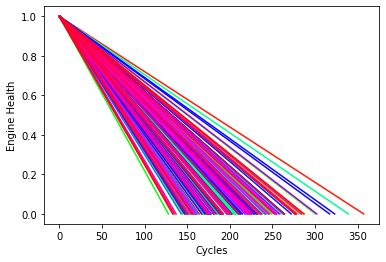

In [ ]:
ak_y = []
ak_y.append(1)
ak_y.append(0)

ak_y = np.array(ak_y)

#218 engines
for i in range(0, 218):
  ak_x = []
  ak_x.append(0)
  ak_x.append(time[i])
  ak_x = np.array(ak_x)
  plt.plot(ak_x, ak_y, c=cmap(i))

plt.xlabel("Cycles")
plt.ylabel("Engine Health")
plt.show()

In [ ]:
#we will prepare matrix for output for linear regression here

k = 0
y_target = np.zeros([x_input.shape[0] ,1])
for i in range(0, x_input.shape[0]):
  y_target[i] = 1 - (x_input[i][1] / time[k])
  if time[k] == x_input[i][1]:
    k = k+1

ad_mat = np.ones([x_input.shape[0] ,1])
feature_mat = np.zeros([x_input.shape[0] ,5])

feature_mat[:][4] = ad_mat[:][0]
for i in range(0, x_input.shape[0]):
  #s16 column 21
  feature_mat[i][0] = x_input[i][20]
  #s11 column 16
  feature_mat[i][1] = x_input[i][15]
  #s4 column 9
  feature_mat[i][2] = x_input[i][8]
  #s15 column 20
  feature_mat[i][3] = x_input[i][19]

print(feature_mat.shape)
print(y_target.shape)

(45918, 5)
(45918, 1)


In [ ]:
#pseudo inverse method to find weights

weights = np.zeros([5, 1])

#weights = np.dot(np.dot(np.linalg.inv(np.dot(feature_mat.T, feature_mat)), feature_mat.T), y_target)
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(feature_mat, y_target)
weights = reg.coef_

weights = weights.T
weights

array([[-4.11954990e+01],
       [-3.93795472e-01],
       [ 5.57754792e-03],
       [-1.07564186e+00],
       [ 2.85812565e-01]])

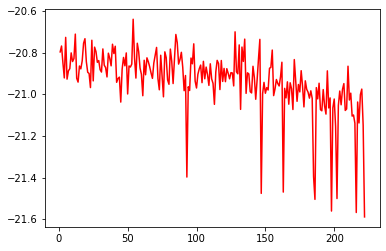

In [ ]:
engine_health = np.zeros([x_input.shape[0], 1])

for i in range(0, x_input.shape[0]):
  engine_health[i][0] = (weights[0]*x_input[i][20]) + (weights[1]*x_input[i][15]) + (weights[2]*x_input[i][8]) + (weights[3]*x_input[i][19]) + weights[4]

for k in range(0, 217):
  if k==0:
    plt.plot(x_input[0:indice[0], 1], engine_health[0:indice[0], 0], c=cmap(0))
  #plt.plot(x_input[indice[k]+1:indice[k+1], 1], engine_health[indice[k]+1:indice[k+1], 0], c=cmap(k+1))

plt.show()

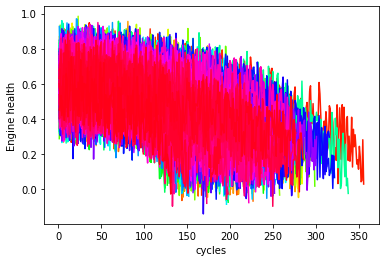

In [ ]:
#we will prepare matrix for output for linear regression here

k = 0
y_target = np.zeros([x_input.shape[0] ,1])
for i in range(0, x_input.shape[0]):
  y_target[i] = 1 - (x_input[i][1] / time[k])
  if time[k] == x_input[i][1]:
    k = k+1

#ad_mat = np.ones([x_input.shape[0] ,1])
feature_mat = np.zeros([x_input.shape[0] ,3])

for i in range(0, x_input.shape[0]):
  #s16 column 21
  #feature_mat[i][0] = x_input[i][20]
  #s11 column 16
  feature_mat[i][0] = x_input[i][15]
  #s2 column 7
  feature_mat[i][1] = x_input[i][6]
  #s15 column 20
  feature_mat[i][2] = x_input[i][19]


#weights = np.dot(np.dot(np.linalg.inv(np.dot(feature_mat.T, feature_mat)), feature_mat.T), y_target)
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(feature_mat, y_target)
weights = reg.coef_

weights = weights.T

engine_health = np.zeros([x_input.shape[0], 1])

for i in range(0, x_input.shape[0]):
  engine_health[i][0] = (weights[0]*x_input[i][15]) + (weights[1]*x_input[i][6]) + (weights[2]*x_input[i][19]) + reg.intercept_

for k in range(0, 217):
  if k==0:
    plt.plot(x_input[0:indice[0], 1], engine_health[0:indice[0], 0], c=cmap(0))
  plt.plot(x_input[indice[k]+1:indice[k+1], 1], engine_health[indice[k]+1:indice[k+1], 0], c=cmap(k+1))

plt.xlabel("cycles")
plt.ylabel("Engine health")
plt.show()

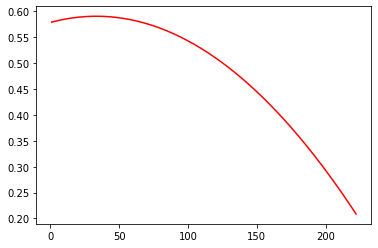

In [ ]:
cc = np.polyfit(x_input[0:indice[0], 1], engine_health[0:indice[0], 0], 2)

plt.plot(x_input[0:indice[0], 1], cc[0]*x_input[0:indice[0], 1]**2 + cc[1]*x_input[0:indice[0], 1] + cc[2], c=cmap(0))

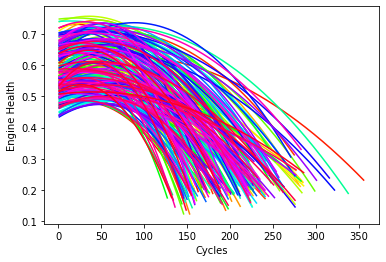

In [ ]:
for k in range(0, 217):
  if k==0:
    cc = np.polyfit(x_input[0:indice[0], 1], engine_health[0:indice[0], 0], 2)
    plt.plot(x_input[0:indice[0], 1], cc[0]*x_input[0:indice[0], 1]**2 + cc[1]*x_input[0:indice[0], 1] + cc[2], c=cmap(0))
  cc = np.polyfit(x_input[indice[k]+1:indice[k+1], 1], engine_health[indice[k]+1:indice[k+1], 0], 2)
  plt.plot(x_input[indice[k]+1:indice[k+1], 1], cc[0]*x_input[indice[k]+1:indice[k+1], 1]**2 + cc[1]*x_input[indice[k]+1:indice[k+1], 1] + cc[2], c=cmap(k+1))

plt.xlabel("Cycles")
plt.ylabel("Engine Health")
plt.show()

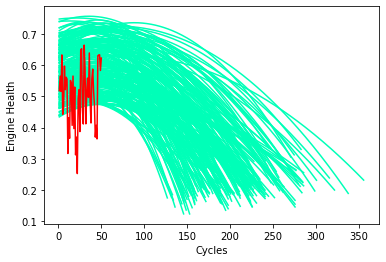

In [ ]:
for k in range(0, 217):
  if k==0:
    cc = np.polyfit(x_input[0:indice[0], 1], engine_health[0:indice[0], 0], 2)
    plt.plot(x_input[0:indice[0], 1], cc[0]*x_input[0:indice[0], 1]**2 + cc[1]*x_input[0:indice[0], 1] + cc[2], c=cmap(100))
  cc = np.polyfit(x_input[indice[k]+1:indice[k+1], 1], engine_health[indice[k]+1:indice[k+1], 0], 2)
  plt.plot(x_input[indice[k]+1:indice[k+1], 1], cc[0]*x_input[indice[k]+1:indice[k+1], 1]**2 + cc[1]*x_input[indice[k]+1:indice[k+1], 1] + cc[2], c=cmap(100))

plt.xlabel("Cycles")
plt.ylabel("Engine Health")

engine_health_test = np.zeros([50, 1])

for i in range(0, 50):
  engine_health_test[i][0] = (weights[0]*x_input2[i][15]) + (weights[1]*x_input2[i][6]) + (weights[2]*x_input2[i][19]) + reg.intercept_

plt.plot(x_input2[0:50, 1], engine_health_test[0:50, 0], c=cmap(0))
plt.show()


In [ ]:
engine_health_train = np.zeros([x_input.shape[0], 1])
#engine_health_train quadratic best fit curves hai

for k in range(0, 217):
  if k==0:
    cc = np.polyfit(x_input[0:indice[0], 1], engine_health[0:indice[0], 0], 2)
    engine_health_train[0:indice[0], 0] = cc[0]*x_input[0:indice[0], 1]**2 + cc[1]*x_input[0:indice[0], 1] + cc[2]
  cc = np.polyfit(x_input[indice[k]+1:indice[k+1], 1], engine_health[indice[k]+1:indice[k+1], 0], 2)
  engine_health_train[indice[k]+1:indice[k+1], 0] = cc[0]*x_input[indice[k]+1:indice[k+1], 1]**2 + cc[1]*x_input[indice[k]+1:indice[k+1], 1] + cc[2]


#----------------------------------------------------------
avg_dist = []
dist = []

for k in range(0, 217):
  if k==0:
    dist = []
    for i in range(0, 50):
      d  = np.sqrt(np.power(engine_health_train[i, 0] - engine_health_test[i, 0] ,2 ))
      dist.append(d)
    avg_dist.append(np.mean(dist))
  dist = []
  for i in range(indice[k]+1, indice[k]+1 + 50):
    d  = np.sqrt(np.power(engine_health_train[i, 0] - engine_health_test[i - (indice[k]+1), 0] ,2 ))
    dist.append(d)
  avg_dist.append(np.mean(dist))

avg_dist = np.array(avg_dist)
#---------------------------------------------------------
#finding least 10 distances form the graph

temp_arr = np.zeros([218, 1])

for i in range(0, 218):
  temp_arr[i] = avg_dist[i]

temp_arr.sort(axis=0)

print("The engines with graph closest to the test data are:")
engine_number = []
for i in range(0, 10):
  j = np.where(avg_dist == temp_arr[i])
  print(j)
  j = np.array(j)
  engine_number.append(np.asscalar(j))


The engines with graph closest to the test data are:
(array([174]),)
(array([27]),)
(array([20]),)
(array([16]),)
(array([216]),)
(array([211]),)
(array([77]),)
(array([152]),)
(array([136]),)
(array([161]),)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


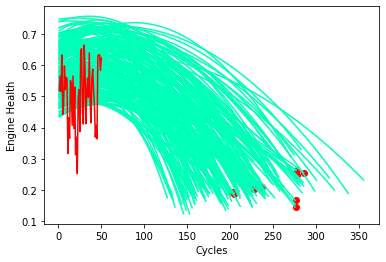

In [ ]:
for k in range(0, 217):
  if k==0:
    plt.plot(x_input[0:indice[0], 1], engine_health_train[0:indice[0] ,0], c=cmap(100))
  plt.plot(x_input[indice[k]+1:indice[k+1], 1], engine_health_train[indice[k]+1:indice[k+1] ,0], c=cmap(100))

plt.xlabel("Cycles")
plt.ylabel("Engine Health")


plt.plot(x_input2[0:50, 1], engine_health_test[0:50, 0], c=cmap(0))

engine_number = np.array(engine_number)
for i in range(0, 10):
  plt.scatter(x_input[indice[engine_number[i]] ,1], engine_health_train[indice[engine_number[i]]-1 ,0], color = 'r')
plt.show()


In [ ]:
final_rul = []
for i in range(0, 10):
  final_rul.append(time[engine_number[i]])

final_rul = np.array(final_rul)
print("The total life of this engine seems to be:")
print(np.median(final_rul), "cycles")
print("-----------------------------------------")
print("Hence the remaining useful life of this engine is:")
print(np.median(final_rul) - 50, "cycles")

The total life of this engine seems to be:
257.0 cycles
-----------------------------------------
Hence the remaining useful life of this engine is:
207.0 cycles
